# Introduction

Notre sujet porte sur l’influence au cours du temps du scandale des Ouïghours sur le cours des actions des entreprises qui les exploitent. Cette étude porte surtout sur le mois d’octobre 2020. Nous nous intéressons tout d’abord à la médiatisation du scandale. Pour chiffrer cette médiatisation, nous choisissons de compter le nombre de tweet utilisant le hashtag Uyghurs.
Ensuite, nous étudions le cours des actions des entreprises concernées. Nous avons sélectionné dix enseignes.
Dans chacun des deux cas, nous effectuons une représentation graphique du nombre de tweet au cours du temps, respectivement du prix des actions au cours du temps. 
En observant les résultats de la comparaison entre ces deux courbes, on observe qu’il ne semble pas toujours exister une corrélation. Nous nous demandons donc pourquoi les différents pics de médiatisation ont une influence différente sur le cours des actions. Pour ce faire, nous étudions les mots les plus utilisés dans les tweets.

# Scrapping du hashtag Uyghurs et Ouighours

Nous nous questionnons tout d’abord sur l’ampleur de la médiatisation de ce scandale au cours du temps.

Pour ce faire, nous récupérons des bases de données en scrappant le fil d'actualité twitter. 
Une base de données comporte le nombre de tweets faisant mention du hashtag Ouighours et une autre le hashtag Uyghurs par heure entre 24/09/2020 et le 31/10/2020. 

Nous représentons ensuite graphiquement l’évolution du nombre de ces tweets au cours du temps.


### Import des bases de donnée scrappées avec selenium

Le code pour extraire ces données est disponible à la fin du code (il est très long à éxecuter)

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

### Série temporelle brute du hashtag Ouighours

In [2]:
df = pd.read_csv("nb_tweet_h_ouighours.csv")

#changement du format des données temporelles en format intéligible pour python
df["date"] = pd.to_datetime(df["date"], format = "%Y-%m-%dT%H")

#affichage de la tendance
fig = px.line(df, x="date", y="value")
fig.show()

### Série temporelle avec moyen mobile sur 24h du hashtag Ouighours

In [3]:
# moyenne mobile
df['roll_day'] = df["value"].rolling(24, center=True).mean()

#plot
fig = px.line(df, x="date", y="roll_day")
fig.show()

### Série temporelle brute du hashtag Uyghurs

In [4]:
df_1 = pd.read_csv("nb_tweet_h_uyghurs.csv")
df_1["date"] = pd.to_datetime(df_1["date"], format = "%Y-%m-%dT%H")

#plot
fig = px.line(df_1, x="date", y="value")
fig.show()

### Série temporelle avec moyen mobile sur 24h du hashtag Uyghurs

In [5]:
df_1['roll_day'] = df_1["value"].rolling(24, center=True).mean()

#plot
fig = px.line(df_1, x="date", y="roll_day")
fig.show()


Pour le hashtag français (Ouighurs), nous observons 3 pics majeurs, un le 2, un le 14 et un du 24 au 25 octobre.

Pour le hashtag anglophone, nous observons quatre pics majeurs, le 02, le 08, du 13 au 16 et le 22 octobre.

On desside par la suite de se consentrer sur le hashtag anglophone car nous pensons qu'il devrait avoir plus d'influence sur la Bourse.

# Etude du cours des actions des marques liées à ce scandale

 Nous nous intéressons ensuite au cours des actions de dix marques qui exploitent les Ouïghours. 
 
 Nous obtenons alors le prix en bourse des actions des différentes marques par heure entre le 17/09/2020 et le 11/11/2020. 
 
 Nous ne gardons que les dates et heures sans valeurs manquantes. 
 
 De plus, pour chaque heure, nous avons le prix en bourse à l’ouverture, à la fermeture, la valeur la plus élevée ainsi que la valeur la plus faible durant cette heure.Pour n’avoir qu’une seule valeur de prix à une certaine heure et une certaine date pour une action, nous choisissons de faire la moyenne des quatre prix précédemment énoncés.
  
 Nous représentons graphiquement l’évolution du prix des actions des différents marques individuellement après avoir normalisé les prix puis en les séparant en deux catégories : les marques de mode et les autres.
 
 Nous avons voulu représenter une tendance encore plus générale et avons donc fait la moyenne des prix normalisés des actions sur les dix marques.

In [6]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date
import plotly.express as px
from functools import reduce 
import plotly.graph_objects as go

### Import les données

Là aussi le code pour récuper ces données n'est pas montré tout de suite, il sera présenté à la fin car l'API utilisé permet d'extraire que les 2 derniers mois.

Nous avons donc au préalable fait tourner le code pour extraire ces données.

In [7]:
dict_brand = {}

# les marques utilisées
brands=['Apple', 'Adidas', 'Abercrombie', 'Amazon', 'BMW', 'Bosch', 'Dell', 'Microsoft', 'Nike','Zara']

#import de toutes les marques
for name in brands:
    dict_brand[name] =  pd.read_csv(name + '.csv', sep=',',decimal=',')
df = pd.read_csv('nb_tweet_h_uyghurs.csv')

In [8]:
#Renommer les colonnes pour différencier ensuite les marques
for name in brands : 
    dict_brand[name] = dict_brand[name].rename(columns={'1. open':'open_'+name, '2. high' : 'high_'+name, '3. low' : 'low_'+name, '4. close':'close_'+name}).drop('5. volume', axis=1)

In [9]:
#Faire la conversion de l'index en type date
for name in brands :
    dict_brand[name]['index'] = pd.to_datetime(dict_brand[name]['index'], format = "%Y-%m-%d %H:%M:%S")
df['index'] = pd.to_datetime(df['date'], format = '%Y-%m-%d %H:%M:%S')

In [10]:
#Faire la moyenne par  heure pour chaque marque
dict_moyenne={}
for name in brands : 
    dict_moyenne[name] = dict_brand[name][['open_'+name,'high_'+name,'low_'+name,'close_'+name]].astype(float)
    dict_brand[name]['avg_'+name] = dict_moyenne[name].mean(axis=1)

In [11]:
# Ne conserver que les dates auxquelles toutes les valeurs sont non nulles
data_frames = [dict_brand[name] for name in brands]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['index'],how='outer'), data_frames).dropna()
df_merged['index'] = pd.to_datetime(df_merged['index'], format = "%Y-%m-%d %H:%M:%S")

Nous choisissons de normaliser et de centrer les données utilisées pour mieux étudier les variations des prix.


In [12]:

# on donne à chaque marque une couleur, on les traces en deux fois 
fashion_brands_and_colors = [['Adidas','blue'], ['Abercrombie','black'], ['Nike','gold'], ['Zara','firebrick']]
other_brands_and_colors = [['Apple','red'], ['Amazon','green'], ['BMW','yellow'], ['Bosch','pink'], ['Dell','purple'], ['Microsoft','orange']]

fig = go.Figure()
for [name, c] in fashion_brands_and_colors:
    # on normalise et on centre les prix des actions
    df_merged[name+'_normalisé'] = (df_merged["avg_"+name] - df_merged["avg_"+ name].mean()) / pd.DataFrame.std(df_merged["avg_"+ name])

    # on trace
    scatter = go.Scatter(
        x = df_merged["index"],
        y =  df_merged[name+'_normalisé'],
        name = name,
        line = dict(color=c,width=4)
    )
    fig.add_trace(scatter)
    

fig.update_layout(
    title = "Evolution du cours des actions des marques 'fashion'",
    xaxis_title = 'Date',
    yaxis_title = 'Cours des actions normalisés'
)
fig.show()


fig = go.Figure()
for [name, c] in other_brands_and_colors:
    # on normalise et on centre les prix des actions
    df_merged[name+'_normalisé'] = (df_merged["avg_"+name] - df_merged["avg_"+ name].mean()) / pd.DataFrame.std(df_merged["avg_"+ name])

    # on trace
    scatter = go.Scatter(
        x = df_merged["index"],
        y =  df_merged[name+'_normalisé'],
        name = name,
        line = dict(color=c,width=4)
    )
    fig.add_trace(scatter)
    

fig.update_layout(
    title = "Evolution du cours des actions des autres marques liées au scandale",
    xaxis_title = 'Date',
    yaxis_title = 'Cours des actions normalisés'
)
fig.show()

### Evolution de la moyenne des prix des dix actions au cours du temps


In [13]:
moyenne10 = df_merged[[name+'_normalisé' for name in brands]].astype(float)
df_merged['avg10'] = moyenne10.mean(axis=1)

#plot
fig = px.line(df_merged, x="index", y='avg10')
fig.show()

# Impact de la hausse de l'influence du hashtag Uyghurs sur le prix des actions

- Pour voir l'influence possible que le hashtag a eu, nous récupérons pour chacun des quatres pics un intervalle de temps pendant lequel l'affluence était très grande

In [30]:
Intervalles = [
    ["2020-10-01T07", "2020-10-02T15"],
    ["2020-10-06T15", "2020-10-08T11"],
    ["2020-10-13T05", "2020-10-16T17"],
    ["2020-10-21T04", "2020-10-22T17"],
]

for i in range(len(Intervalles)):
    for j in range(len(Intervalles[i])):
        Intervalles[i][j] = pd.to_datetime(Intervalles[i][j], format = "%Y-%m-%dT%H")
        

In [31]:
starting_time = df_merged['index'].iloc[1]
ending_time = df_merged['index'].iloc[-1]



### Impact différent pour les marques orientées fashion et les autres marques ?

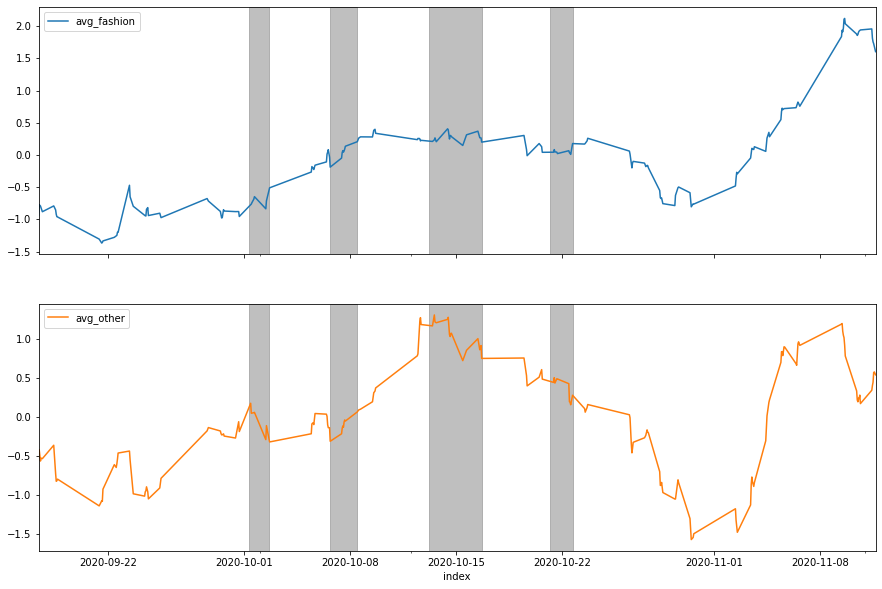

In [36]:
fashion_brands = ['Adidas', 'Abercrombie', 'Nike', 'Zara']
other_brands = ['Apple', 'Amazon', 'BMW', 'Bosch', 'Dell', 'Microsoft']

moyenne_fashion_brands = df_merged[[name+'_normalisé' for name in fashion_brands]].astype(float)
df_merged['avg_fashion'] = moyenne_fashion_brands.mean(axis=1)

moyenne_other_brands = df_merged[[name+'_normalisé' for name in other_brands]].astype(float)
df_merged['avg_other'] = moyenne_other_brands.mean(axis=1)

#plot
fig, axes = plt.subplots(2,1, figsize=(15,10), sharex=True)
df_merged[["avg_fashion", "avg_other", "index"]].set_index("index").plot(subplots=True, ax =axes)
for i in Intervalles:
    for ax in axes:
        ax.axvspan(i[0], i[1], color='grey', alpha=0.5)

### Impact sur l'ensemble des entreprises sélectionnées

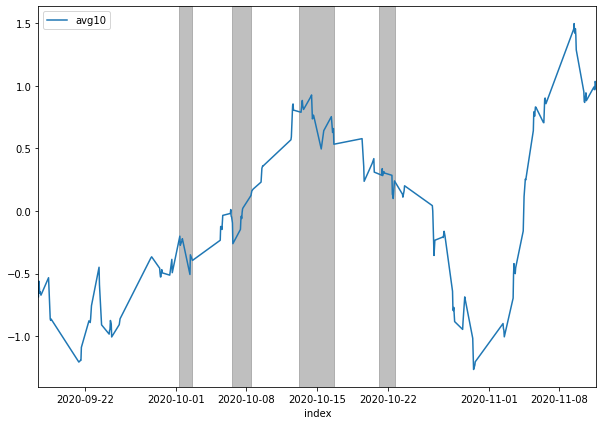

In [33]:
fig, axe = plt.subplots(1,1, figsize=(10,7), sharex=True)
df_merged[["avg10", "index"]].set_index("index").plot(subplots=True, ax =axe)
for i in Intervalles:
    axe.axvspan(i[0], i[1], color='grey', alpha=0.5)


 Nous remarquons que lors des périodes avec une forte protestation pour les Ouïghours (bandes grises), le prix des actions ont une tendance à la baisse. Nous observons une baisse sensible le 02/10/2020 et le 08/10/2020, une baisse plus marquée le 15/10/2020 ainsi qu’une tendance à la baisse plus faible pour les 22/10/2020 que ce soit pour la moyenne des dix actions ou pour les "autres marques". Surtout lors des 3 premières périodes, la diminution du prix lors de la dernière période semble peu significative. Cela pourait être expliqué par l'intensité du dernier pic d'affluence qui est plus faible que les autres, mais il n'est pas non plus significativement plus petit que le deuxième qui lui à eu un impact qui ne semble pas négligeable sur le prix des actions.
 
Pour les marques de mode, la corrélation semble encore plus faible, surtout pour le pic du 15 octobre. Il est possible que la Fashion Week débutant le 15 octobre à LA ait eu une influence à la hausse des ventes dans le milieu de la mode, ce qui compense la baisse causée par le pic de médiatisation du scandale des Ouïghours à cette date là.

Nous remarquons donc que les différents pics de médiatisation du scandale des Ouïghours n’ont pas la même influence sur le cours des actions. Nous nous demandons alors si ces pics sont de natures différentes.

# Différentier les pics de protests avec une étude de NLP

In [43]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import base64
import string
import re
import nltk

from collections import Counter
from time import time

from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from pywaffle import Waffle
import wordcloud

from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation


from nltk.corpus import stopwords

Nous importons des bases de données préalablement scrappées avec seaborn, ici aussi le code sera à la fin.

Nous utilisons 4 bases de données, chacune comporte les textes des tweets publiés durant une certaine période.

Les périodes ont été choisies autour des 4 grands pics.

Nous essayons de dégager une tendance dans ces tweets.


In [38]:
list_time = [
    ["2020-09-30", "2020-10-05"],
    ["2020-10-05", "2020-10-11"],
    ["2020-10-11", "2020-10-18"],
    ["2020-10-18", "2020-10-25"],
]

all_df = {}
l = 0
for starting_time, ending_time in list_time:
    all_df[l] = pd.read_csv("text_tweets_h_Uyghurs" + starting_time + "_" + ending_time + ".csv")[["text"]]
    l += 1

df = all_df[0]
for i in range(1,l):
    df = pd.concat([df, all_df[i]])

Nous nettoyons les bases de données, nous mettons tout d'abord les caractères en minuscule, nous enlevons les ponctuations et les mots de liaisons et nous prenons la racine de chaque mot dans le texte.

Chose à noter, comme ici nous ne nous intéressons qu'aux tweets anglophones, lors du scrapping nous avons mis une condition pour obtenir que les tweets en anglais.

In [42]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

df["text_lower"] = df["text"].apply(lambda x: x.lower())
df["text_processed"] = df["text_lower"].apply(lambda x: nltk.word_tokenize(x, language='english'))
df["text_processed_is_alpha"] = df["text_processed"].apply(lambda x: [word for word in x if word.isalpha()])
df["text_tokenized_wo_stopwords"] = df["text_processed_is_alpha"].apply(lambda x: [w for w in x if not w in stop_words])
df["text_lemmatized"] = df["text_tokenized_wo_stopwords"].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])

### World cloud pour voir la tendance des mots utilisés dans les tweets 

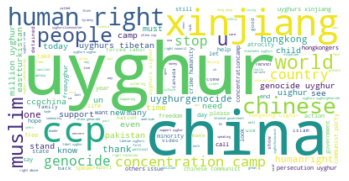

In [44]:
list_wc = []
for list_world in df["text_lemmatized"]:
    for world in list_world:
        list_wc.append(world)

wc = wordcloud.WordCloud(background_color="white", max_words=2000)
wc.generate(' '.join(list_wc))        
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Affichage des dix mots les plus utilisés

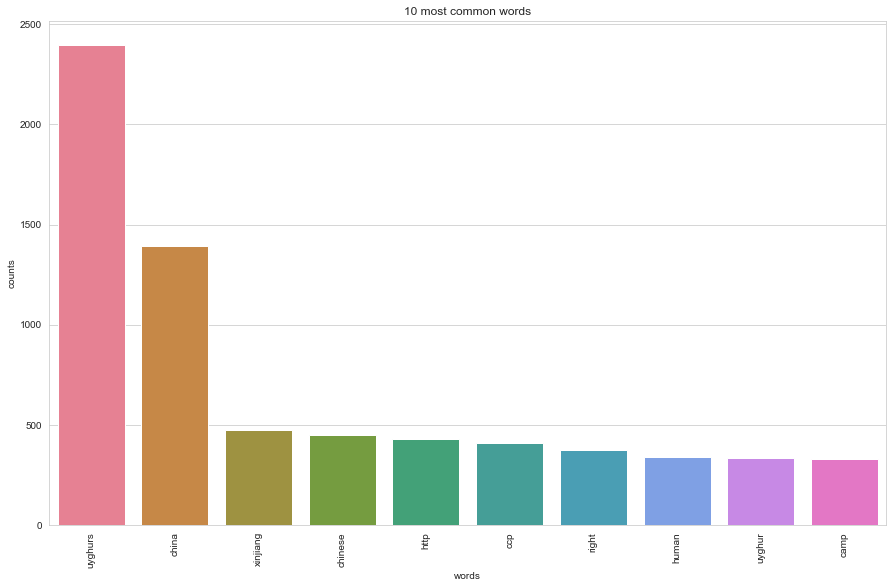

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

sns.set_style('whitegrid')

# fonction pour montrer les 10 mots les plus communs extraite d'un article medium
def plot_10_most_common_words(count_data, count_vectorizer):

    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df["text_lemmatized"].apply(lambda x: ' '.join(x)))
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

### Latent Dirichlet Allocation

Pour entrainer l'algorithme, nous decidons d'enlever certains mots, car peu utile pour séparer nos textes en plusieurs clusters

In [46]:
list_worlds_to_get_out = ["uyghurs", "china", "chinese", "http", "uyghur"]

def get_out(x):
    y = []
    for word in x:
        if not word in list_worlds_to_get_out:
            y.append(word)
    return y

df["text_lemmatized_wout_keyworlds"] = df["text_lemmatized"].apply(get_out)


# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df["text_lemmatized_wout_keyworlds"].apply(lambda x: ' '.join(x)))


In [60]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 2
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
results = lda.fit_transform(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
right human xinjiang camp genocide muslim ccp concentration forced million

Topic #1:
ccp hongkong people xinjiang world uyghurgenocide tibet thank tibetan support


Cette cellule permet de générer un fichier html permettant de visualiser facilement les caractéristiques des clusters trouvés (mots les plus représentés, ceux qui ont le plus d’influences etc.)

In [63]:
%%time
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))


LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)

with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, "rb") as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

Wall time: 2min 21s


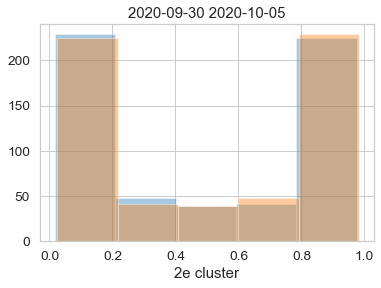

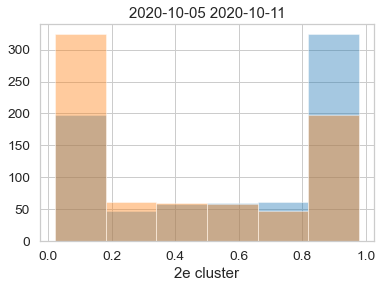

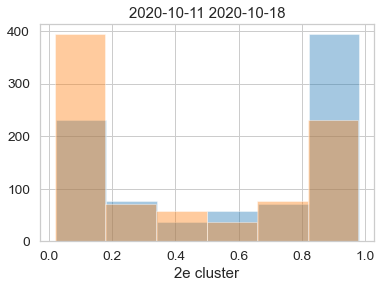

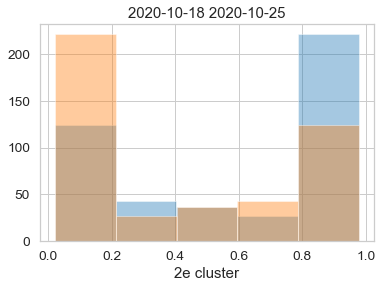

In [62]:
df_dict = {}
number = 0
for starting_time, ending_time in list_time:
    df_dict[number] =  pd.read_csv("text_tweets_h_Uyghurs" + starting_time + "_" + ending_time + ".csv")


    df_dict[number]["text_processed"] =df_dict[number]["text"].apply(lambda x: nltk.word_tokenize(x, language='english'))
    df_dict[number]["text_processed_is_alpha"] = df_dict[number]["text_processed"].apply(lambda x: [word for word in x if word.isalpha()])
    df_dict[number]["text_tokenized_wo_stopwords"] = df_dict[number]["text_processed_is_alpha"].apply(lambda x: [w for w in x if not w in stop_words])
    df_dict[number]["text_lemmatized"] = df_dict[number]["text_tokenized_wo_stopwords"].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])
    count_data_1 = count_vectorizer.transform(df_dict[number]["text_lemmatized"].apply(lambda x: ' '.join(x)))
    df_dict[number]["score"] = pd.Series(list(lda.transform(count_data_1)))
    for i in range(number_topics):
        df_dict[number][str(i + 1) + "e cluster"] = df_dict[number]["score"].apply(lambda x: x[i])
        sns.distplot(df_dict[number][str(i+1) + "e cluster"], kde = False)
    plt.title(starting_time + " " + ending_time)
    plt.show()
    number += 1

Après avoir essayé plusieurs nombres de clusters et fait tourner plusieurs fois l’algorithme sur un même nombre de clusters, nous avons décidé de choisir 2 clusters.

Pour 2 clusters nous pouvons voir que l’algorithme sépare les messages qui s’indignent contre les violences faites aux ouighours de ceux qui s’indignent de la violation des droits de l’Homme.

Mais ces deux combats sont liés. Accorder plus d’importance à un tweet sur ces critères ne semble pas raisonnable.

Nous ne pouvons donc pas expliquer la faible influence sur le cours de bourse du dernier pic.



# Conclusion

Pour conclure, nous pouvons observer une corrélation entre le scandale des Ouïghours et le cours des actions des entreprises concernées en particulier à certaines dates clés 02/10/2020, 08/10/2020 et 15/10/2020. Cependant, cette corrélation n’est pas toujours flagrante ou existante (22/10/2020) ce qui amène à se poser la question des différences d'influence des pics de médiatisation. Il existe effectivement une petite différence. Au moment du premier pic de médiatisation, les internautes semblent tout d’abord indignés émotionnellement puis aux pics suivants, ils ont une réflexion plus politique sur le sujet. Même si nous distinguons ces deux tendances, cela ne semble pas avoir d'influence sur les baisses plus ou moins importantes du cours des actions.
Nous observons aussi une baisse globale importante du cours des actions entre la 14/10 et le 30/10 qui ne peut s’expliquer par notre étude. Cette baisse peut par exemple s’expliquer par le contexte sanitaire actuel, contexte qui n’est pas pris en compte dans notre étude. 
Enfin, il ne faut pas oublier que le cours des actions est déterminé par les actionnaires qui vendent et achètent. Pour les deux premiers pics, nous pouvons observer que la chute du cours des actions a lieu dès le début de la période critique. Les actionnaires ont du anticipé cette chute à cause du scandale et ont vendus leurs actions rapidement. Pour le dernier pic, nous pouvons supposer que la actionnaires ont considéré que le scandale s'estompait et d'où la baisse plus faible du cours des actions.

# Annexe

## Scrapping des dates des tweets #Ouighurs et #Uyghurs

In [66]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd
from collections import Counter

from time import sleep
import random
import time

In [65]:
browser_path = r"C:\Users\mathi\Desktop\Progra\appli\chromedriver.exe"

Nous créons une fonction pour attendre avant de scroll down pour ne pas être bloqué par twitter.

In [67]:
def sleep_for(opt1, opt2):
    time_for = random.uniform(opt1, opt2)
    time_for_int = int(round(time_for))
    sleep(abs(time_for_int - time_for))
    for i in range(time_for_int, 0, -1):
        sleep(1)

Nous regardons les données avant le premier novembre.

In [70]:
new_time_of_the_request = "2020-11-01"
time_of_the_request = ""

scroll_down_num = 200
list_times = []
j=0

Nous créons une boucle pour scroller indéfiniment.

Il faut savoir que twitter nous bloque à partir de 250 scroll-downs donc à chaque fois que nous avons scrollé 200 fois, nous prenons le temps du tweet le plus reculé dans le temps et nous effectuons une nouvelle requête à partir de cette date.

Twitter permet de faire des recherches par hashtag et avec des commandes pour faciliter la recherche.

La commande entré est "#Uyghurs until:2020-11-01"

In [ ]:
while time_of_the_request != new_time_of_the_request:
    driver = webdriver.Chrome(executable_path=browser_path)
    time_of_the_request = new_time_of_the_request
    url = "https://twitter.com/search?q=%23Uyghurs%20until%3A" + time_of_the_request + "&src=typed_query&f=live"
    driver.get(url)
    sleep_for(10, 15)  # sleep a while




    # scroll x number of times
    for i in range(1, scroll_down_num):

        # scroll down
        driver.find_element_by_xpath('//body').send_keys(Keys.END)
        sleep_for(1, 3)


        post_elem = driver.find_elements_by_xpath("//div/div/div/div/div/div/div/a/time")
        

        for post_time in post_elem:
            try:
                time_t = post_time.get_attribute("datetime")
            except:
                j += 1
            if not time_t in list_times:
                list_times.append(time_t)
                start = time.time()

        if i % 50 == 0:
            print(i/scroll_down_num)

    new_time_of_the_request = list_times[-1][:13] + "%3A" + list_times[-1][14:16] + "%3A" + list_times[-1][17:]
    driver.close()
    if int(new_time_of_the_request[:4]) < 2020:
        break


    
    with open("stop.txt", "r") as f:
        text = f.read()
    if text == "stop":
        text = ""
        break

In [ ]:
date = [time_t[:13] for time_t in list_times]
nb_tweets = Counter(date)
df = pd.DataFrame(list(nb_tweets.items()), columns = ["date", "value"]) 

# dernière commande pour télécharger les données
#df.to_csv("nb_tweet_h_uyghurs.csv")

Nous excécutons le même programme avec #Ouighours pour avoir le hashtag français.

## Scrapping des textes issus des différentes dates ciblées

In [ ]:
list_time = [
    ["2020-09-30", "2020-10-05"],
    ["2020-10-05", "2020-10-11"],
    ["2020-10-11", "2020-10-18"],
    ["2020-10-18", "2020-10-25"],
]

Nous modifions un peu le code précédent pour pouvoir cette fois-ci extraire des textes, tout en étant sûr de ne pas obtenir des tweets qui ne sont pas dans l'intervalle

In [ ]:
k = 0
for starting_time, ending_time in list_time:

    # how many times should the browser scroll down
    scroll_down_num = 200
    list_text = []
    j=0

    # loop through your list of urls
    while starting_time < ending_time:

        driver = webdriver.Chrome(executable_path=browser_path)
        url = "https://twitter.com/search?q=%23Uyghurs%20until%3A" + ending_time + "&src=typed_query&f=live"
        driver.get(url)
        sleep_for(10, 15)  # sleep a while




        # scroll x number of times
        for i in range(1, scroll_down_num):

            # scroll down
            driver.find_element_by_xpath('//body').send_keys(Keys.END)
            sleep_for(1, 3)


            post_elem = driver.find_elements_by_xpath("//div/div/div/div/div/div[@lang='en']")
            

            for post_text in post_elem:
                try:
                    text = post_text.text
                except:
                    j += 1
                if not text in list_text:
                    list_text.append(text)
                    start = time.time()
            post_times = driver.find_elements_by_xpath("//div/div/div/div/div/div/div/a/time")
            if len(post_times) != 0:
                last_time = post_times[-1].get_attribute("datetime")
                ending_time = last_time[:13] + "%3A" + last_time[14:16] + "%3A" + last_time[17:]

            if starting_time > ending_time:
                break

            if i % 50 == 0:
                print(i/scroll_down_num)



        
        with open("stop.txt", "r") as f:
            text_stop = f.read()
        if text_stop == "stop":
            text_stop = ""
            break
        driver.close()
    df = pd.DataFrame(list_text, columns=["text"])

    # dernière étape pour télécharger le fichier 
    #df.to_csv("text_tweets_h_Uyghurs" + list_time[k][0] + "_" + list_time[k][1] + ".csv")

    k += 1

## Extraction des données financières

In [ ]:
from alpha_vantage.timeseries import TimeSeries

ts = TimeSeries(key='XZTFR53W0A1VS35N', output_format='pandas', indexing_type='integer')

data, meta_data = ts.get_intraday('AAPL', interval='60min', outputsize='full')

#data.to_csv('Apple.csv',index=False)
